# helper for ploting images

In [7]:
import torch
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# plot the image and optinal labels in a grid
def plot(*args, n_col=None, figsize=None, axis_off=True):
    '''Plot the images in a grid with optional labels
    usage: plot(img1, img2, ...)
    usage: plot(img1, label1, img2, label2, ...)
    optional: n_col=3, figsize=(12, 8), axis_off=True

    img: torch.Tensor of shape (C, H, W) or (H, W, C)
    label: str
    '''
    # prepare the elements to plot as (image, label)
    elems = []
    for el in args:
        if isinstance(el, torch.Tensor):
            if el.dim() == 4: el = el[0] # if picture is a batch, take the first one
            assert el.dim() == 3, f"Wrong image shape {el.shape}"
            if el.shape[0] == 3: el = el.permute(1, 2, 0) # if image is (C, H, W), convert to (H, W, C)
            if el.requires_grad: el = el.detach()
            elems.append([el])
        elif isinstance(el, str): elems[-1].append(el)
        else: raise ValueError(f"Wrong element ({type(el)}) {repr(el)}")
    elems = [(el[0], el[1] if len(el) == 2 else None) for el in elems]

    # plot the images
    n_col = n_col or len(elems)
    n_row = math.ceil(len(elems) / n_col)
    figsize = figsize or (n_col * 4, n_row * 4)
    fig, ax = plt.subplots(n_row, n_col, figsize=figsize)
    if n_row == 1 and n_col == 1: ax = np.array([ax])
    for i, (img, label) in enumerate(elems):
        idx = (i,) if n_row == 1 or n_col == 1 else (i // n_col, i % n_col)
        if label: ax[*idx].set_title(label)
        ax[*idx].imshow(img)
    # remove the axis
    for i in range(n_row * n_col):
        idx = (i,) if n_row == 1 or n_col == 1 else (i // n_col, i % n_col)
        if axis_off: ax[*idx].axis('off')
    plt.tight_layout()
    plt.show()

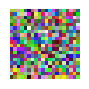

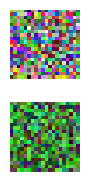

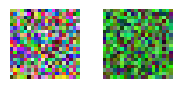

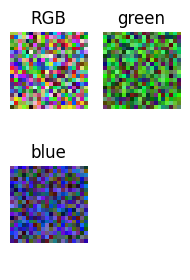

In [50]:
# usage demo
im = torch.rand([3, 20, 20])
im2 = torch.rand([20, 20, 3]) * torch.tensor([0.5, 1., 0.5])
im3 = torch.rand([20, 20, 3]) * torch.tensor([0.5, 0.5, 1.])

plot(im, figsize=(1, 1))
plot(im, im2, n_col=1, figsize=(1, 2))
plot(im, im2, figsize=(2, 1))
plot(im, 'RGB', im2, 'green', im3, 'blue', n_col=2, figsize=(2, 3))